In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import re
import nltk
import seaborn as sns

In [3]:
text_data=pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [4]:
text_data.head(1)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   

        product_rating       overall_rating     brand  \
0  No rating available  No rating available  Elegance   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...

In [544]:
text_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                        product_name  \
0  elegance polyester multicolor abstract eyelet ...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

                                         description     brand  \
0  key features of elegance polyester multicolor ...  Elegance   

                              product_specifications         categorie  \
0  {"product_specification"=>[{"key"=>"brand", "v...  Home Furnishing    

                                                 bow  len  cluster  
0  polyest abstract eyelet door curtain curtain a...  448        1

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f87e83acf40>,
      dtype=object)

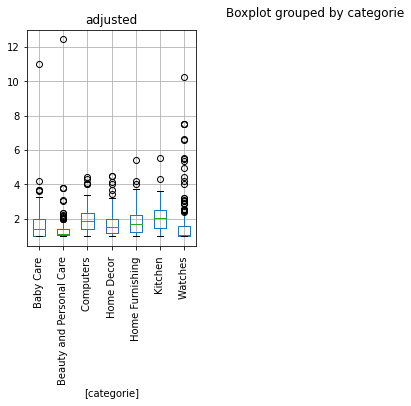

In [552]:
text_data['adjusted']=text_data['retail_price']/text_data['discounted_price']
text_data[['adjusted','categorie']].dropna(how='any').boxplot(by="categorie", figsize=(10,4), layout=(1,3),showfliers=True,rot=90)


# Exploration des données textes du tableau et récupération des données texte

In [5]:
for i in range(10):
    print(text_data.iloc[i]['product_url'],text_data.iloc[i]['product_name'])

http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z Elegance Polyester Multicolor Abstract Eyelet Door Curtain
http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH Sathiyas Cotton Bath Towel
http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y Eurospa Cotton Terry Face Towel Set
http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4 SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet
http://www.flipkart.com/jaipur-print-cotton-floral-king-sized-double-bedsheet/p/itmejthnwahrnt7v?pid=BDSEJTHNGWVGWWQU Jaipur Print Cotton Floral King sized Double Bedsheet
http://www.flipkart.com/maserati-time-r8851116001-analog-watch-boys/p/itmeayahfma4r9kp?pid=WATEAYAHJ8CUCAYM Maserati Time R8851116001 Analog Watch  - For Boys
http://www.flipkart.com/camerii-wm64-eleg

In [6]:
#Au final la colonne product name correspond à l'extraction des mots de l'url on a donc pas besoin de l'url
text_data.drop(['crawl_timestamp','product_url'],axis=1,inplace=True)

In [7]:
text_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   

        product_rating       overall_rating     brand  \
0  No rating available  No rating available  Elegance   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...

In [8]:
text_data.isnull().sum()

uniq_id                      0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [9]:
for i in range(10):
    print(text_data.iloc[i]['product_category_tree'])

["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]
["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]
["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]
["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]
["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]
["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]
["Watches >> Wrist Watches >> Camerii Wrist Watches"]
["Watches >> Wrist Watches >> T STAR Wrist Watches"]
["Watches >> Wrist Watches >> Alfajr Wrist Watches"]
["Watches >> Wrist Watches >> TAG Heuer Wrist Watches"]


In [10]:
#On va récupérer le premier mot qui nous donne la catégorie
#On va récupérer le reste des mots pour nos bags of words

def categorie(x):
    m = re.findall('^\["([A-Za-z ]*)', x)
    return m[0]

def catclean(x):
    m = re.findall('>> (\w* *&* \w*)', x)
    return m

In [11]:
categorie('["Watches >> Wrist Watches >> Camerii Wrist Watches"]')

'Watches '

In [12]:
text_data['categorie']=text_data['product_category_tree'].apply(lambda x:categorie(x))

In [13]:
text_data['categorie']

0       Home Furnishing 
1             Baby Care 
2             Baby Care 
3       Home Furnishing 
4       Home Furnishing 
              ...       
1045          Baby Care 
1046          Baby Care 
1047          Baby Care 
1048          Baby Care 
1049          Baby Care 
Name: categorie, Length: 1050, dtype: object

In [14]:
text_name={}
text_data['product_name']=text_data['product_name'].apply(lambda x:x.lower())
for i in text_data['categorie'].unique():
    text_name[i]=' '.join(text_data[text_data['categorie']==i]['product_name'])

In [15]:
text_name

{'Home Furnishing ': "elegance polyester multicolor abstract eyelet door curtain santosh royal fashion cotton printed king sized double bedsheet jaipur print cotton floral king sized double bedsheet santosh royal fashion cotton embroidered diwan set house this queen cotton duvet cover riva carpets cotton free bath mat classic loop shag bathmat_ri-527 jmd printed cushions cover kripa's printed cushions cover prime printed 4 seater table cover prime printed 8 seater table cover jaipur print cotton floral diwan set craft trade oval wood coaster set rama floral single quilts & comforters pink-red rama floral single quilts & comforters yellow shop rajasthan abstract single dohar multicolor artisan creation checkered single quilts & comforters brown rama floral single quilts & comforters blue-beige remtex export cartoon single dohar multicolor quilt india floral cushions cover bhavya velvet sofa cover dreamshomes velvet sofa cover jewelkraft designs brown, pink table linen set tidy printed c

In [16]:
text_data['bow']=text_data['product_category_tree'].apply(lambda x:catclean(x)).apply(lambda x:' '.join(x))

In [17]:
text_data['bow']=text_data['bow'].apply(lambda x: x.lower()).apply(lambda x: re.sub(r'&','',x)).apply(lambda x: re.sub(r'\s+',' ',x))

In [18]:
text_data['bow']

0        curtains accessories curtains elegance polyester
1       baby bath baby bath sathiyas baby sathiyas cotton
2         baby bath baby bath eurospa baby eurospa cotton
3         bed linen bedsheets santosh royal santosh royal
4           bed linen bedsheets jaipur print jaipur print
                              ...                        
1045                      baby kids stickers oren empower
1046               baby kids stickers wallmantra stickers
1047                 baby kids stickers uberlyfe stickers
1048               baby kids stickers wallmantra stickers
1049                 baby kids stickers uberlyfe stickers
Name: bow, Length: 1050, dtype: object

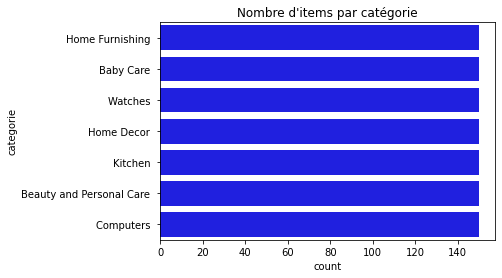

In [19]:
plt.title("Nombre d'items par catégorie")
sns.countplot(y="categorie", data=text_data[['categorie']], color='blue')
plt.show()

In [20]:
#on en a exactmeent le même nombre par catégorie

In [21]:
#On va faire une analyse de fréquence des mots par catégorie:
#on crée un dictionnaire de catégorie:
text_cat={}
for i in text_data['categorie'].unique():
    text_cat[i]=' '.join(text_data[text_data['categorie']==i]['bow'])

In [22]:
text_cat

{'Home Furnishing ': 'curtains accessories curtains elegance polyester bed linen bedsheets santosh royal santosh royal bed linen bedsheets jaipur print jaipur print living room diwan sets santosh royal santosh royal bed linen duvet covers house this house this bath linen bath mats jmd home jmd printed  kitchen dining table covers prime printed kitchen dining table covers prime printed living room diwan sets jaipur print jaipur print kitchen dining coasters craft trade craft trade bed linen bed linen bed linen bed linen bed linen bed linen remtex export cushion covers quilt india living sofa covers bhavya velvet living sofa covers dreamshomes velvet kitchen dining table linen jewelkraft designs tidy home tidy printed bed linen bedsheets jbc collection jbc collection living room lushomes living lushomes plain bed linen bed linen bed linen bath linen bath mats amit carpet kitchen dining kitchen linen cotonex black kitchen dining kitchen linen cotonex blue kitchen dining kitchen linen coto

In [23]:
text_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                        product_name  \
0  elegance polyester multicolor abstract eyelet ...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   

        product_rating       overall_rating     brand  \
0  No rating available  No rating available  Elegance   

                              product_specifications         categorie  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing    

                                                bow  
0  curtains accessories curtains elegance polyester

In [24]:
text_data.drop(['is_FK_Advantage_product','product_rating','overall_rating'],axis=1,inplace=True)

In [25]:
text_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                        product_name  \
0  elegance polyester multicolor abstract eyelet ...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

                                         description     brand  \
0  Key Features of Elegance Polyester Multicolor ...  Elegance   

                              product_specifications         categorie  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing    

                                                bow  
0  curtains accessories curtains elegance polyester

In [26]:
text_descr={}
text_data['description']=text_data['description'].apply(lambda x:x.lower())
for i in text_data['categorie'].unique():
    text_descr[i]=' '.join(text_data[text_data['categorie']==i]['description'])

In [27]:
text_descr

{'Home Furnishing ': 'key features of elegance polyester multicolor abstract eyelet door curtain floral curtain,elegance polyester multicolor abstract eyelet door curtain (213 cm in height, pack of 2) price: rs. 899 this curtain enhances the look of the interiors.this curtain is made from 100% high quality polyester fabric.it features an eyelet style stitch with metal ring.it makes the room environment romantic and loving.this curtain is ant- wrinkle and anti shrinkage and have elegant apparance.give your home a bright and modernistic appeal with these designs. the surreal attention is sure to steal hearts. these contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. bring home the elegant curtain that softly filters light in 

In [28]:
#On a la marque dans les spécifications donc on ne va prendre que les spécifications:
text_spec={}
text_data['product_specifications']=text_data['product_specifications'].fillna('').apply(lambda x:x.lower())

def spec(x):
    pattern=re.compile(r'=>"(\w+)"')
    matches=pattern.findall(x)
    return ' '.join(matches)

for i in text_data['categorie'].unique():
    text_spec[i]=' '.join(text_data[text_data['categorie']==i]['product_specifications'])

In [29]:
text_spec

{'Home Furnishing ': '{"product_specification"=>[{"key"=>"brand", "value"=>"elegance"}, {"key"=>"designed for", "value"=>"door"}, {"key"=>"type", "value"=>"eyelet"}, {"key"=>"model name", "value"=>"abstract polyester door curtain set of 2"}, {"key"=>"model id", "value"=>"duster25"}, {"key"=>"color", "value"=>"multicolor"}, {"key"=>"length", "value"=>"213 cm"}, {"key"=>"number of contents in sales package", "value"=>"pack of 2"}, {"key"=>"sales package", "value"=>"2 curtains"}, {"key"=>"material", "value"=>"polyester"}]} {"product_specification"=>[{"key"=>"brand", "value"=>"santosh royal fashion"}, {"key"=>"machine washable", "value"=>"yes"}, {"key"=>"type", "value"=>"flat"}, {"key"=>"material", "value"=>"cotton"}, {"key"=>"model name", "value"=>"gold design royal cotton printed wedding and gifted double bedsheet with 2 pillow cover"}, {"key"=>"model id", "value"=>"goldbedi-38"}, {"key"=>"color", "value"=>"multicolor"}, {"key"=>"size", "value"=>"king"}, {"key"=>"fabric care", "value"=>"

In [30]:
text_all={}
for i in text_data['categorie'].unique():
    text_all[i]=text_name[i]+' '+text_cat[i]+' '+text_descr[i]+' '+text_spec[i]

# Création d'une première liste de Stopwords

In [31]:
noms=['noms','catégories','description','spécifications','tout']
dicos=[text_name,text_cat,text_descr,text_spec,text_all]

In [32]:
def string_clean(x):
    words_clean = re.sub('[^A-Za-z ]',' ', x) #je garde que les mots avec des lettres
    words_clean = re.sub('\s+',' ', words_clean) #j'enlève les espaces en trop
    return words_clean.lower()
    
for i in text_data['categorie'].unique():
    for j in dicos:
        j[i]=string_clean(j[i])

In [33]:
text_all

{'Home Furnishing ': 'elegance polyester multicolor abstract eyelet door curtain santosh royal fashion cotton printed king sized double bedsheet jaipur print cotton floral king sized double bedsheet santosh royal fashion cotton embroidered diwan set house this queen cotton duvet cover riva carpets cotton free bath mat classic loop shag bathmat ri jmd printed cushions cover kripa s printed cushions cover prime printed seater table cover prime printed seater table cover jaipur print cotton floral diwan set craft trade oval wood coaster set rama floral single quilts comforters pink red rama floral single quilts comforters yellow shop rajasthan abstract single dohar multicolor artisan creation checkered single quilts comforters brown rama floral single quilts comforters blue beige remtex export cartoon single dohar multicolor quilt india floral cushions cover bhavya velvet sofa cover dreamshomes velvet sofa cover jewelkraft designs brown pink table linen set tidy printed cushions cover jbc

In [34]:
categ=text_data['categorie'].unique()

In [35]:
nb_mots={}
#On regarde le nombre de mots par catégories:
from nltk import word_tokenize
nb_mots['init']=[]
for i in dicos:
    nb_mots['init'].append([])
    for j in categ:
        nb_mots['init'][-1].append(len(nltk.word_tokenize(i[j])))


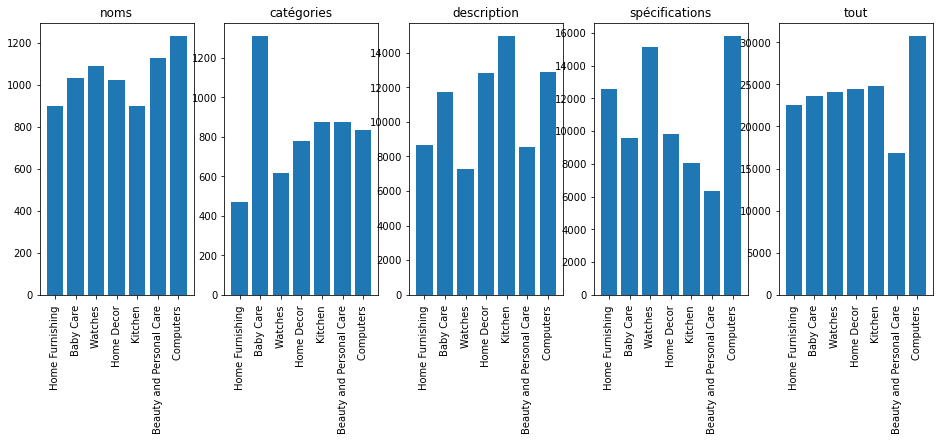

In [36]:
nb_mots['init']
fig=plt.figure(figsize=(16,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.bar(range(7),nb_mots['init'][i])
    plt.xticks(range(7), categ,  rotation = 90)
    plt.title(noms[i])
plt.show()

In [37]:
#Regardonc les nombres de mots différents:

In [38]:
nb_mots['init_diff']=[]
for i in dicos:
    nb_mots['init_diff'].append([])
    for j in categ:
        nb_mots['init_diff'][-1].append(len(nltk.FreqDist(nltk.word_tokenize(i[j]))))


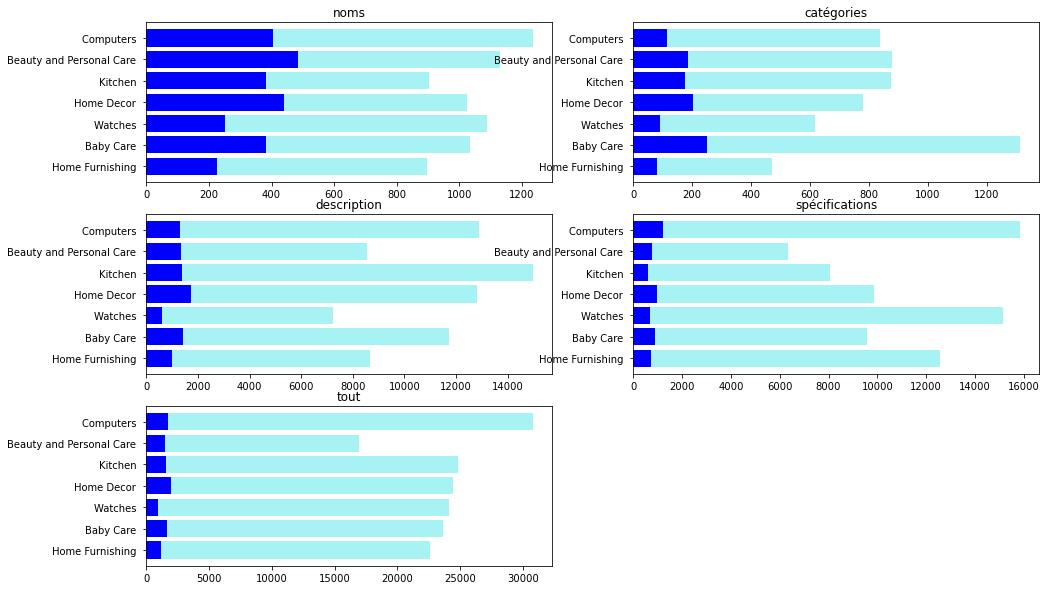

In [39]:
fig=plt.figure(figsize=(16,10))
for i in range(5):
    plt.subplot(3,2,i+1)
    plt.barh(range(7),nb_mots['init'][i],color='#A7F2F2')
    plt.barh(range(7),nb_mots['init_diff'][i],color='blue')
    plt.yticks(range(7), categ)
    plt.title(noms[i])
plt.show()

In [40]:
#On commence par appliquer les stop_words classiques:

In [41]:
from nltk.corpus import stopwords
sw=set(stopwords.words('english'))

In [42]:
#Pour la suite on va tokenizer nos corpus:
for i in dicos:
    for j in categ:
        i[j]=nltk.word_tokenize(i[j])


In [43]:
#On supprime cette première liste de sw:
nb_mots['sw1_diff']=[]
for i in dicos:
    nb_mots['sw1_diff'].append([])
    for j in categ:
        i[j]=[k for k in i[j] if k not in sw]
        nb_mots['sw1_diff'][-1].append(len(nltk.FreqDist(i[j])))
        

In [44]:
nb_mots

{'init': [[898, 1033, 1089, 1024, 902, 1130, 1235],
  [469, 1311, 617, 780, 873, 876, 836],
  [8651, 11736, 7246, 12812, 14979, 8570, 12876],
  [12556, 9569, 15130, 9842, 8061, 6329, 15832],
  [22574, 23649, 24082, 24458, 24815, 16905, 30779]],
 'init_diff': [[227, 384, 252, 439, 384, 485, 404],
  [81, 249, 90, 204, 174, 187, 115],
  [991, 1428, 612, 1747, 1370, 1360, 1303],
  [723, 909, 685, 988, 591, 768, 1199],
  [1200, 1646, 909, 1926, 1546, 1514, 1713]],
 'sw1_diff': [[220, 370, 242, 427, 354, 473, 383],
  [77, 241, 86, 200, 171, 185, 112],
  [914, 1332, 557, 1654, 1272, 1279, 1219],
  [684, 848, 634, 934, 555, 724, 1141],
  [1121, 1546, 843, 1831, 1446, 1432, 1625]]}

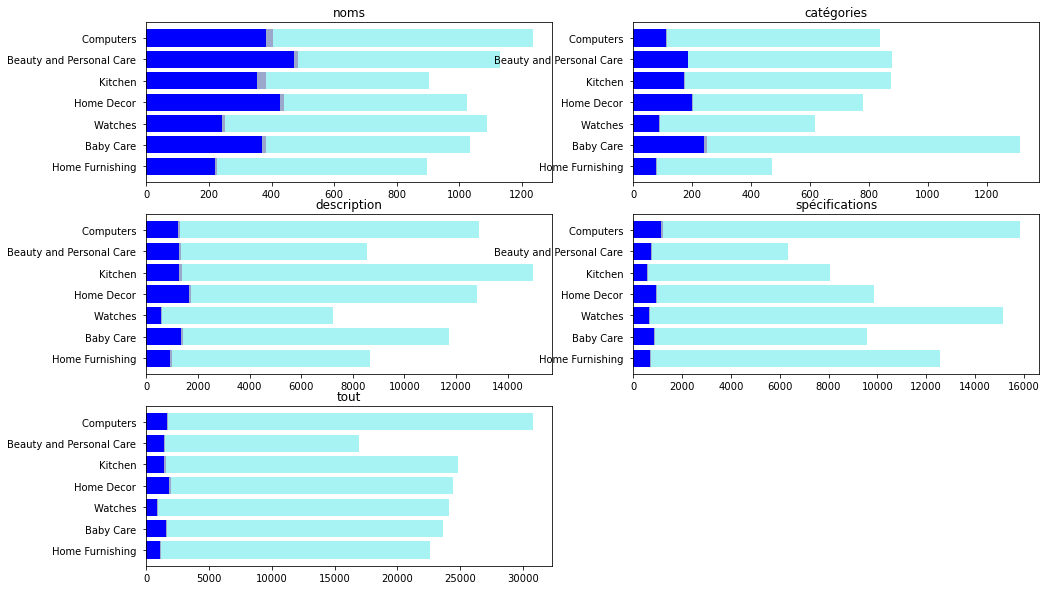

In [45]:
fig=plt.figure(figsize=(16,10))
for i in range(5):
    plt.subplot(3,2,i+1)
    plt.barh(range(7),nb_mots['init'][i],color='#A7F2F2')
    plt.barh(range(7),nb_mots['init_diff'][i],color='#9BA8CB')
    plt.barh(range(7),nb_mots['sw1_diff'][i],color='blue')
    plt.yticks(range(7), categ)
    plt.title(noms[i])
plt.show()

# Stemming et Lemmatization

In [46]:
#On teste plusieurs stemmers:

#Stemmer
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer

def modif(texte,stemmer):
    count=0
    dico={}
    for mot in texte:
        stemm=stemmer
        m=stemm.stem(mot)
        if m!=mot:
            count+=1
            if m in dico:
                if mot not in dico[m]:
                    dico[m].append(mot)
            else :
                dico[m]=[mot]
    
    return len(dico),count
               


In [47]:
L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
Name=['Lancaster','Porter','Snowball']

for i in range(3):
    print(Name[i],modif(text_descr['Watches '],L[i]))

Lancaster (259, 2758)
Porter (192, 1928)
Snowball (184, 1890)


In [48]:
#Lancaster parait plus efficace mais regardons les différences:
def modif2(texte):
    L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
    Name=['Lancaster','Porter','Snowball']
    dico={}
    for i in range(3):
        count=0
        for mot in texte:
            stemm=L[i]
            m=stemm.stem(mot)
            if m!=mot:
                if mot in dico:
                    if Name[i] not in dico[mot]:
                        dico[mot][Name[i]]=m
                else:
                    dico[mot]={Name[i]:m}
    
    return dico

In [49]:
modif2(text_descr['Watches '][:100])

{'maserati': {'Lancaster': 'maserat'},
 'time': {'Lancaster': 'tim'},
 'boys': {'Lancaster': 'boy', 'Porter': 'boy', 'Snowball': 'boy'},
 'online': {'Lancaster': 'onlin', 'Porter': 'onlin', 'Snowball': 'onlin'},
 'india': {'Lancaster': 'ind'},
 'great': {'Lancaster': 'gre'},
 'discounts': {'Lancaster': 'discount',
  'Porter': 'discount',
  'Snowball': 'discount'},
 'genuine': {'Lancaster': 'genuin', 'Porter': 'genuin', 'Snowball': 'genuin'},
 'products': {'Lancaster': 'produc',
  'Porter': 'product',
  'Snowball': 'product'},
 'replacement': {'Lancaster': 'replac',
  'Porter': 'replac',
  'Snowball': 'replac'},
 'guarantee': {'Lancaster': 'guar',
  'Porter': 'guarante',
  'Snowball': 'guarante'},
 'free': {'Lancaster': 'fre'},
 'shipping': {'Lancaster': 'ship', 'Porter': 'ship', 'Snowball': 'ship'},
 'camerii': {'Lancaster': 'cameri'},
 'elegance': {'Lancaster': 'eleg', 'Porter': 'eleg', 'Snowball': 'eleg'},
 'price': {'Lancaster': 'pric'},
 'whether': {'Lancaster': 'wheth'},
 'travell

In [50]:
#On va partir sur Lancaster

In [51]:
#Voyons avec les Lemmetizer:
#Lemmetizer:
from nltk.stem import WordNetLemmatizer
from textblob import Word,TextBlob
from gensim.utils import lemmatize


lem=WordNetLemmatizer()
dico={}
countWN=0
countTB=0
countGEN=0
for t in text_descr['Watches '][:200]:
    if lem.lemmatize(t)!=t:
        countWN+=1
        if t not in dico:
            dico[t]={'WordNet':lem.lemmatize(t)}
    
    w = Word(t)
    if w.lemmatize()!=t:
        countTB+=1
        if t not in dico:
            dico[t]={'TextBlob':w.lemmatize()}
        else:
            dico[t]['TextBlob']=w.lemmatize()
            
print('Wordnet:',countWN,'\t','TextBlob',countTB)
print(dico)



Wordnet: 35 	 TextBlob 35
{'boys': {'WordNet': 'boy', 'TextBlob': 'boy'}, 'rs': {'WordNet': 'r', 'TextBlob': 'r'}, 'discounts': {'WordNet': 'discount', 'TextBlob': 'discount'}, 'products': {'WordNet': 'product', 'TextBlob': 'product'}, 'accessories': {'WordNet': 'accessory', 'TextBlob': 'accessory'}, 'watches': {'WordNet': 'watch', 'TextBlob': 'watch'}, 'wallets': {'WordNet': 'wallet', 'TextBlob': 'wallet'}, 'belts': {'WordNet': 'belt', 'TextBlob': 'belt'}, 'comes': {'WordNet': 'come', 'TextBlob': 'come'}, 'timepieces': {'WordNet': 'timepiece', 'TextBlob': 'timepiece'}, 'times': {'WordNet': 'time', 'TextBlob': 'time'}, 'cities': {'WordNet': 'city', 'TextBlob': 'city'}, 'reminders': {'WordNet': 'reminder', 'TextBlob': 'reminder'}}


In [52]:
#Pas de différence entre les 2 on garde wordnet:
#On va essayer avant après:

lem=WordNetLemmatizer()
def modifapres(texte,stemmer):
    count,count2=0,0
    dico={}
    for mot in texte:
        stemm=stemmer
        m=stemm.stem(mot)
        if m!=mot:
            count+=1
            if lem.lemmatize(m)!=m:
                count2+=1
        else:
            if lem.lemmatize(mot)!=mot:
                count2+=1

    return count,count2

def modifavant(texte,stemmer):
    
    count,count2=0,0
    
    dico={}
    for mot in texte:
        m=lem.lemmatize(mot)
        stemm=stemmer
        if m!=mot:
            count2+=1
            st=stemm.stem(m)
            if st!=m:
                count+=1
        elif stemm.stem(mot)!=mot:
            count+=1
    return(count,count2)


In [53]:
L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
Name=['Lancaster','Porter','Snowball']

for i in range(3):
    print('avant',Name[i],modifavant(text_descr['Watches '],L[i]))
    print('apres',Name[i],modifapres(text_descr['Watches '],L[i]))

avant Lancaster (2457, 856)
apres Lancaster (2758, 221)
avant Porter (1417, 856)
apres Porter (1928, 306)
avant Snowball (1398, 856)
apres Snowball (1890, 325)


In [54]:
#On commance par wordnet puis on fait lancaster
#On applique tout cela à nos corpus et on regarde ce que ça donne:

In [55]:
stemmer=LancasterStemmer()
lem=WordNetLemmatizer()

nb_mots['diff_ap_st_le']=[]
for i in dicos:
    nb_mots['diff_ap_st_le'].append([])
    for j in categ:
        i[j]=[stemmer.stem(lem.lemmatize(item)) for item in i[j]]
        nb_mots['diff_ap_st_le'][-1].append(len(nltk.FreqDist(i[j])))

In [56]:
nb_mots['diff_ap_st_le']

[[210, 359, 239, 405, 339, 449, 366],
 [73, 233, 85, 188, 165, 180, 109],
 [731, 1106, 504, 1287, 1039, 1050, 1014],
 [613, 738, 566, 837, 504, 644, 974],
 [902, 1241, 739, 1424, 1169, 1149, 1302]]

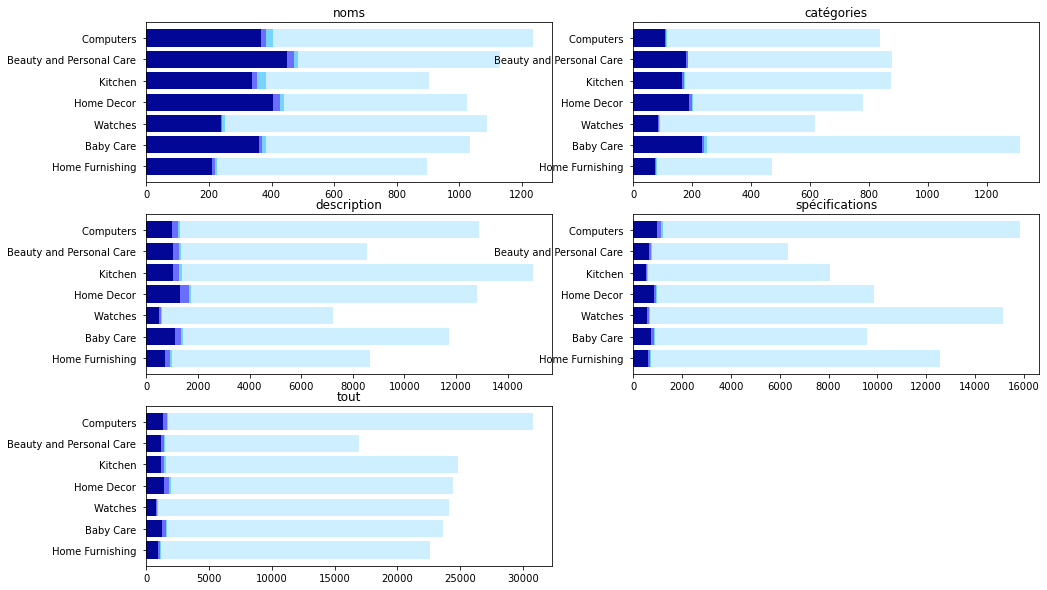

In [57]:
fig=plt.figure(figsize=(16,10))
for i in range(5):
    plt.subplot(3,2,i+1)
    plt.barh(range(7),nb_mots['init'][i],color='#CDEFFF')
    plt.barh(range(7),nb_mots['init_diff'][i],color='#79D3FF')
    plt.barh(range(7),nb_mots['sw1_diff'][i],color='#696EFF')
    plt.barh(range(7),nb_mots['diff_ap_st_le'][i],color='#020795')
    plt.yticks(range(7), categ)
    plt.title(noms[i])
plt.show()

# Analyse des fréquences:

In [58]:
tout=[]
for i in categ:
    tout+=text_all[i]
a=nltk.FreqDist(tout)
len(a)

4288

In [59]:
#Je regarde la répartition de mes mots par catégorie

In [60]:
d={}
D=dict(a)
for i in D.keys():
    d[i]={'all':D[i]}
    for j in categ:
        d2=dict(nltk.FreqDist(text_all[j]))
        if i in d2:
            d[i][j]=d2[i]
        else:
            d[i][j]=0


In [61]:
dat=pd.DataFrame(d)


In [62]:
dat=dat.T

In [ ]:
#Je commence par enlever les mots qui ne sont pas présent plus de 10 fois dans tout le corpus
#Car peu représentatif d'une catégorie

In [64]:
mots=dat[dat['all']>=10].copy()

In [489]:
newsw=set(dat[dat['all']<10].index.tolist())
newsw

{'apl',
 'vamc',
 'pitambar',
 'rc',
 'bnw',
 'hpl',
 'prabhaval',
 'thakk',
 'rut',
 'bul',
 'mosa',
 'camp',
 'rajasthanikart',
 'cartridg',
 'oshe',
 'longev',
 'grab',
 'cutlery',
 'mar',
 'barby',
 'prish',
 'bench',
 'compr',
 'antioxid',
 'thank',
 'lcs',
 'bioelect',
 'loomkart',
 'corog',
 'puj',
 'riddl',
 'weigh',
 'mint',
 'headband',
 'karbon',
 'niko',
 'rick',
 'wf',
 'srvc',
 'tissu',
 'suckl',
 'pamp',
 'choc',
 'prefect',
 'petrochem',
 'preferd',
 'nst',
 'gw',
 'thriller',
 'lookout',
 'physical',
 'crib',
 'cau',
 'dean',
 'gir',
 'minim',
 'dram',
 'backup',
 'renown',
 'sam',
 'match',
 'youcam',
 'aur',
 'pcflatsofxl',
 'pet',
 'rish',
 'floralin',
 'galang',
 'digr',
 'fur',
 'enlarg',
 'workm',
 'ultil',
 'understand',
 'gest',
 'everybody',
 'wink',
 'literid',
 'jsm',
 'wish',
 'monil',
 'transcend',
 'pwr',
 'zai',
 'widw',
 'agromech',
 'arabicoudh',
 'kth',
 'celest',
 'tuff',
 'sint',
 'glit',
 'ragl',
 'spectr',
 'smiley',
 'dens',
 'rabbit',
 'gout',
 

In [66]:
mots.columns=['all','Furnishing','Baby','Watches','Decor','Kitchen','Beauty','Computer']

In [67]:
mots[mots['Furnishing']*mots['Baby']*mots['Watches']*mots['Decor']*mots['Kitchen']*mots['Beauty']*mots['Computer']!=0]

all  Furnishing  Baby  Watches  Decor  Kitchen  Beauty  Computer
multicol  309         119    30        7     73       14      10        56
siz       394         107   108        5     43       48      24        59
set       755          86   109        8     40       65     401        46
cov       541         205    37        2     38       21      20       218
fre       672          79    52      140     87       82     114       118
...       ...         ...   ...      ...    ...      ...     ...       ...
silv       87           2     2       31     24       19       2         7
n         189           6     3       47     12        9       8       104
na         74           3    12        4      6       19      16        14
funct      50           1     1       29     11        1       2         5
smal       53           2    25        1     18        1       3         3

[125 rows x 8 columns]

In [68]:
mots['std']=mots[['Furnishing','Baby','Watches','Decor','Kitchen','Beauty','Computer']].T.std()/mots[['Furnishing','Baby','Watches','Decor','Kitchen','Beauty','Computer']].T.mean()
mots

all  Furnishing  Baby  Watches  Decor  Kitchen  Beauty  Computer  \
eleg       74          17     3        4     13       35       2         0   
polyest   132         119     9        0      0        0       4         0   
multicol  309         119    30        7     73       14      10        56   
abstract  113          85     4        0     12       12       0         0   
eyelet     82          82     0        0      0        0       0         0   
...       ...         ...   ...      ...    ...      ...     ...       ...   
address    12           0     0        0      0        0       0        12   
degc       24           0     0        0      0        0       0        24   
burnt      16           0     0        0      0        0       0        16   
li         14           0     0        0      0        0       0        14   
warrany    11           0     0        0      0        0       0        11   

               std  
eleg      1.177512  
polyest   2.348636  
multicol  0.935449  
abstract  1.910145  
eyelet    2.645751  
...            ...  
address   2.645751  
degc      2.645751  
burnt     2.645751  
li        2.645751  
warrany   2.645751  

[1301 rows x 9 columns]

In [69]:
mots=mots.sort_values(by='std',ascending=False)

In [484]:
mots

all  Furnishing  Baby  Watches  Decor  Kitchen  Beauty  Computer  \
gath      57           0    57        0      0        0       0         0   
glov      16          16     0        0      0        0       0         0   
az        16           0     0       16      0        0       0         0   
hmt       16           0     0       16      0        0       0         0   
offspr    16           0    16        0      0        0       0         0   
...      ...         ...   ...      ...    ...      ...     ...       ...   
typ     1507         170   215      268    195      236     151       272   
produc  2133         250   234      286    328      289     324       422   
spec    1483         201   255      169    193      265     190       210   
r        960         128    95      148    149      140     136       164   
red      158          24    21       25     20       28      22        18   

             std  
gath    2.645751  
glov    2.645751  
az      2.645751  
hmt     2.645751  
offspr  2.645751  
...          ...  
typ     0.216374  
produc  0.204338  
spec    0.166625  
r       0.158886  
red     0.148835  

[1301 rows x 9 columns]

In [70]:
#On ne garde que les 1000 mots avec la variance normalisée la plus importante (on en garde assez pour
# être sûr d'avoir des mots pour chaque catégorie)

In [490]:
corpus=mots.iloc[:1000,:]
newsw.update(set(mots.iloc[1000:,:].index.tolist()))

In [485]:
newsw

{'act',
 'ad',
 'addit',
 'allow',
 'also',
 'amaz',
 'anim',
 'ant',
 'ap',
 'apply',
 'attract',
 'avail',
 'b',
 'back',
 'bal',
 'bas',
 'beauty',
 'bedroom',
 'best',
 'big',
 'black',
 'blend',
 'blu',
 'body',
 'box',
 'brand',
 'bright',
 'brush',
 'busy',
 'button',
 'buy',
 'c',
 'cal',
 'car',
 'cartoon',
 'cash',
 'chair',
 'chang',
 'check',
 'class',
 'cle',
 'clo',
 'cm',
 'col',
 'cold',
 'collect',
 'colo',
 'com',
 'combin',
 'compact',
 'company',
 'complet',
 'cont',
 'conveny',
 'cool',
 'cor',
 'cost',
 'coupl',
 'cov',
 'craft',
 'dark',
 'day',
 'deal',
 'del',
 'delivery',
 'dep',
 'design',
 'dg',
 'diff',
 'dimend',
 'direct',
 'disclaim',
 'dry',
 'due',
 'dur',
 'dust',
 'ear',
 'eas',
 'easy',
 'eleg',
 'end',
 'enh',
 'ev',
 'expery',
 'fam',
 'famy',
 'fash',
 'fast',
 'feat',
 'feel',
 'fin',
 'flipkart',
 'flow',
 'fold',
 'follow',
 'form',
 'four',
 'fre',
 'friend',
 'g',
 'gen',
 'genuin',
 'get',
 'gift',
 'glossy',
 'go',
 'gold',
 'good',
 'grad

In [479]:
corpus

all  Furnishing  Baby  Watches  Decor  Kitchen  Beauty  Computer  \
gath     57           0    57        0      0        0       0         0   
glov     16          16     0        0      0        0       0         0   
az       16           0     0       16      0        0       0         0   
hmt      16           0     0       16      0        0       0         0   
offspr   16           0    16        0      0        0       0         0   
...     ...         ...   ...      ...    ...      ...     ...       ...   
effect   11           0     6        0      1        1       2         1   
rang     69           5     2        2      1        7      15        37   
appear   16           1     0        0      4        0       3         8   
mag      16           0     0        0      5        7       4         0   
vibr     21           3     9        0      8        1       0         0   

             std  
gath    2.645751  
glov    2.645751  
az      2.645751  
hmt     2.645751  
offspr  2.645751  
...          ...  
effect  1.317398  
rang    1.307645  
appear  1.305537  
mag     1.305537  
vibr    1.305260  

[1000 rows x 9 columns]

# On crée nos bag of words

In [491]:
#On rajoute des sw de notre analyse DLA:

newsw.update(set(['laptop'])) #Premier round

In [492]:
def cleaning(name,description,specification,categories):
    stemmer=LancasterStemmer()
    lem=WordNetLemmatizer()
    
    name_clean = name #pas de cleaning particulier sur le nom
    category_clean =' '.join(catclean(categories))
    description_clean = description#pas de cleaning particulier sur la description
    spec_clean=spec(specification)
    words = ' '.join([name_clean, category_clean, description_clean, spec_clean])
    words_clean = string_clean(words) #lower et enlève les nombres et les espaces en trop
    words_list = nltk.word_tokenize(words_clean)
    #on enleve les premiers sw:
    prefinal=[item.lower() for item in words_list if item.lower() not in sw]
    #On stemmise et lemmatize:
    final=[stemmer.stem(lem.lemmatize(item)) for item in prefinal]
    
    return ' '.join([w for w in final if w not in newsw])    

In [493]:
text_data['bow'] = np.vectorize(cleaning)(text_data['product_name'],text_data['description'],\
                                          text_data['product_specifications'],\
                                          text_data['product_category_tree'])
text_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                        product_name  \
0  elegance polyester multicolor abstract eyelet ...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

                                         description     brand  \
0  key features of elegance polyester multicolor ...  Elegance   

                              product_specifications         categorie  \
0  {"product_specification"=>[{"key"=>"brand", "v...  Home Furnishing    

                                                 bow  len  cluster  
0  polyest abstract eyelet door curtain curtain a...  448        1

In [494]:
#On vérifie que l'on a exactement 1000 mots différents:
a=' '.join(text_data['bow'])
b=nltk.word_tokenize(a)
c=nltk.FreqDist(b)
len(c)

978

In [495]:
#Bon j'en ai perdu 21... il devaient pas être très nombreux...

In [496]:
text_data['len']=text_data['bow'].apply(lambda x:len(x))

In [497]:
text_data['len'].describe()

count    1050.00000
mean      196.74000
std       149.24734
min         2.00000
25%        89.00000
50%       154.00000
75%       264.00000
max      1026.00000
Name: len, dtype: float64

In [498]:
def cat(x):
    if x=='Home Furnishing ':
        return 1
    if x=='Kitchen ':
        return 2
    if x=='Computers ':
        return 3
    if x=='Beauty and Personal Care ':
        return 4
    if x=='Watches ':
        return 5
    if x=='Baby Care ':
        return 6
    else:
        return 0

In [499]:
text_data['cluster']=text_data['categorie'].apply(lambda x:cat(x))

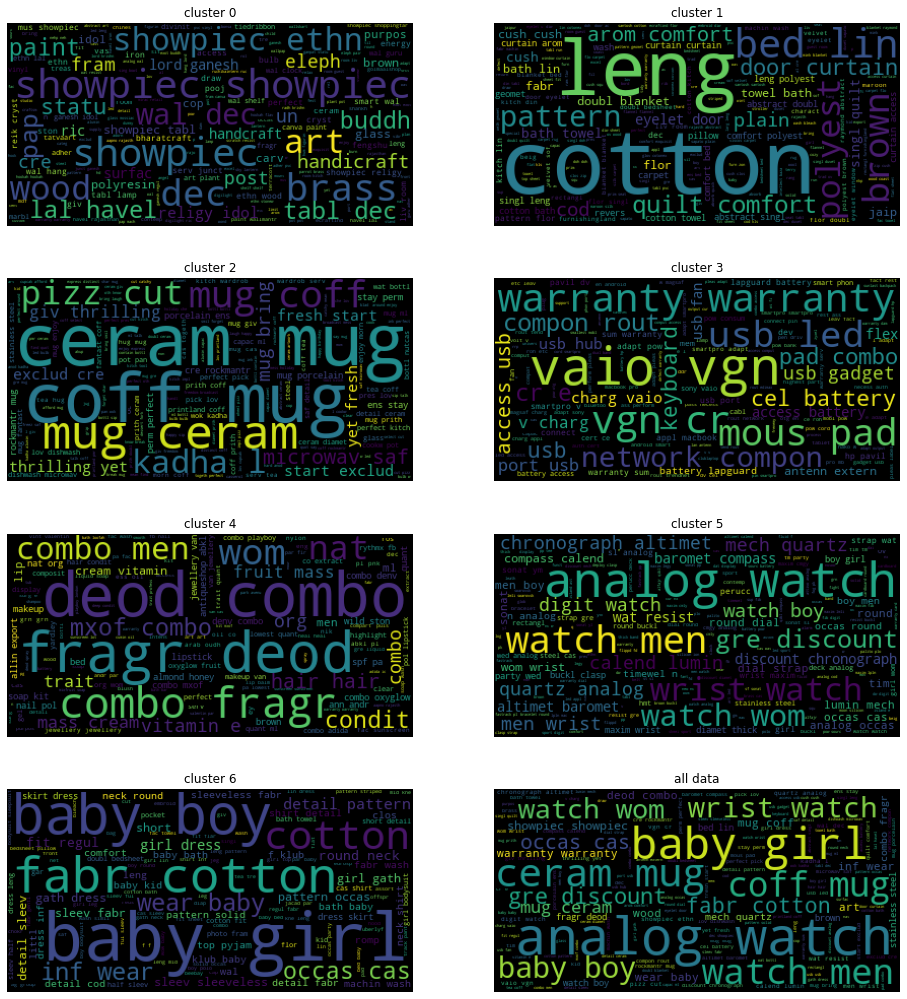

In [500]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="black")
fig=figure(figsize=(16,18))

for i in range(7):
    plt.subplot(4,2,i+1)
    df=text_data[text_data['cluster']==i]
    wordcloud.generate(" ".join(df['bow']))
    plt.imshow(wordcloud)
    plt.title('cluster'+' '+str(i))
    plt.axis('off')

plt.subplot(4,2,8)
wordcloud.generate(" ".join(text_data['bow']))
plt.imshow(wordcloud)
plt.title('all data')
plt.axis('off')
plt.show()

# On va applider une tf_idf

In [501]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize)
values = tfidf.fit_transform(text_data['bow'])


In [502]:
X=values.toarray()

In [503]:
tsne=TSNE(n_components=2,perplexity=40)
X_trans=tsne.fit_transform(X)

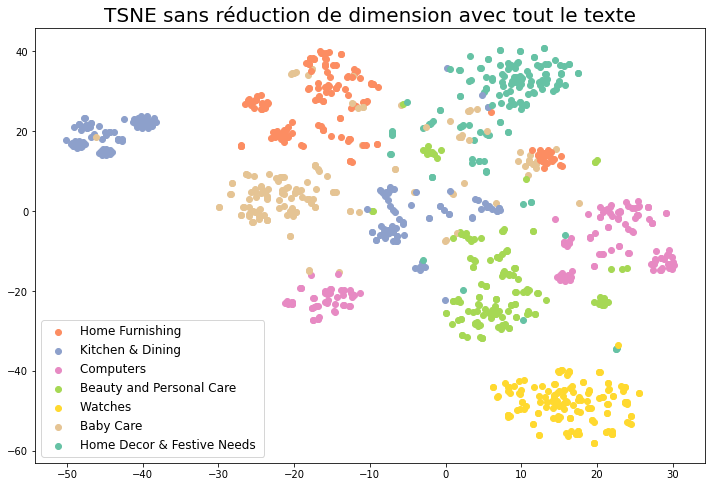

In [504]:
labels=['Home Furnishing ','Kitchen ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor ']
fig=plt.figure(figsize=(12,8))
for i in range(text_data.shape[0]):
    cat=text_data['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),prop={'size':12})
plt.title('TSNE sans réduction de dimension avec tout le texte',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

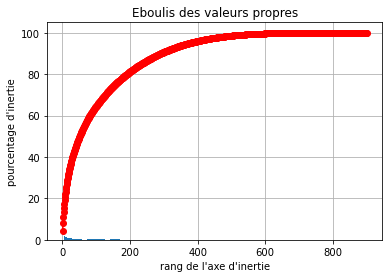

In [505]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=900)
pca.fit(X)
display_scree_plot(pca)

In [506]:
pca = decomposition.PCA(n_components=400)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 400)


In [507]:
X_trans=tsne.fit_transform(X_proj)

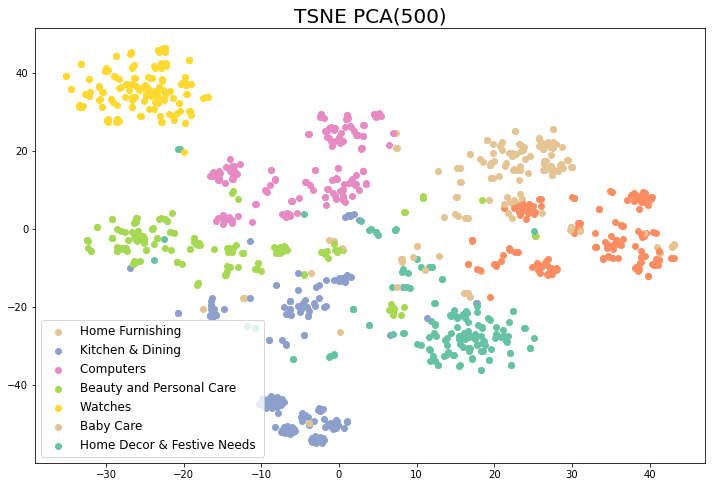

In [508]:
labels=['Home Furnishing ','Kitchen ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor ']
fig=plt.figure(figsize=(12,8))
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=text_data['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),prop={'size':12})
plt.title('TSNE PCA(500)',size=20)
plt.show()

In [411]:
#On essai avec des bi-grammes:

In [412]:
tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize,ngram_range=(2,2))
values = tfidf.fit_transform(text_data['bow'])


In [413]:
X=values.toarray()

In [414]:
tsne=TSNE(n_components=2,perplexity=40)
X_trans=tsne.fit_transform(X)

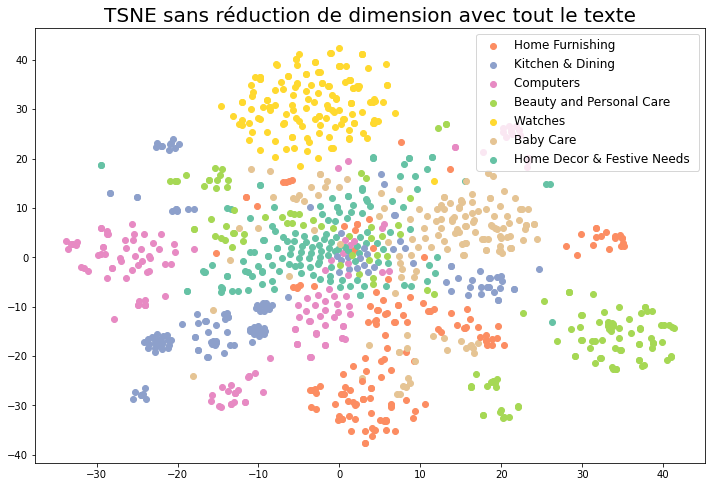

In [415]:
labels=['Home Furnishing ','Kitchen ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor ']
fig=plt.figure(figsize=(12,8))
for i in range(text_data.shape[0]):
    cat=text_data['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),prop={'size':12})
plt.title('TSNE sans réduction de dimension avec tout le texte',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

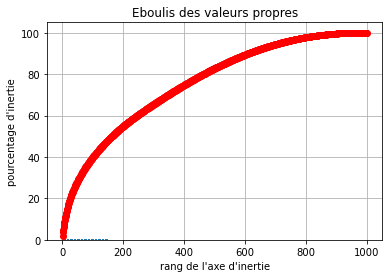

In [416]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=1000)
pca.fit(X)
display_scree_plot(pca)

In [417]:
pca = decomposition.PCA(n_components=600)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 600)


In [418]:
X_trans=tsne.fit_transform(X_proj)

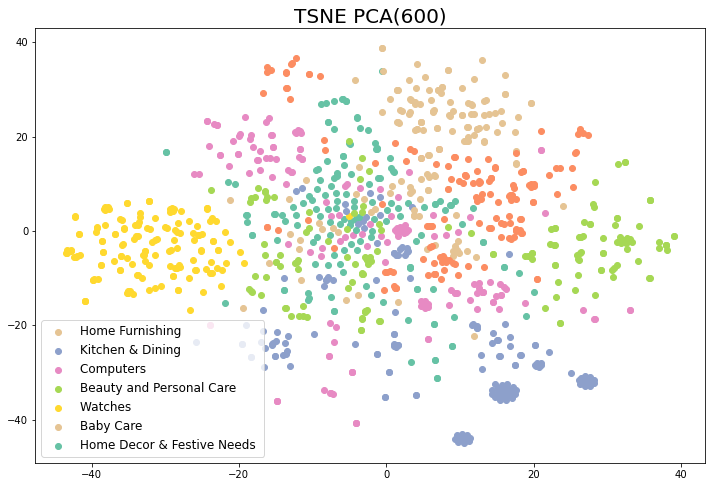

In [419]:
labels=['Home Furnishing ','Kitchen ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor ']
fig=plt.figure(figsize=(12,8))
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=text_data['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),prop={'size':12})
plt.title('TSNE PCA(600)',size=20)
plt.show()

In [420]:
#On va rester sur des monogrammes

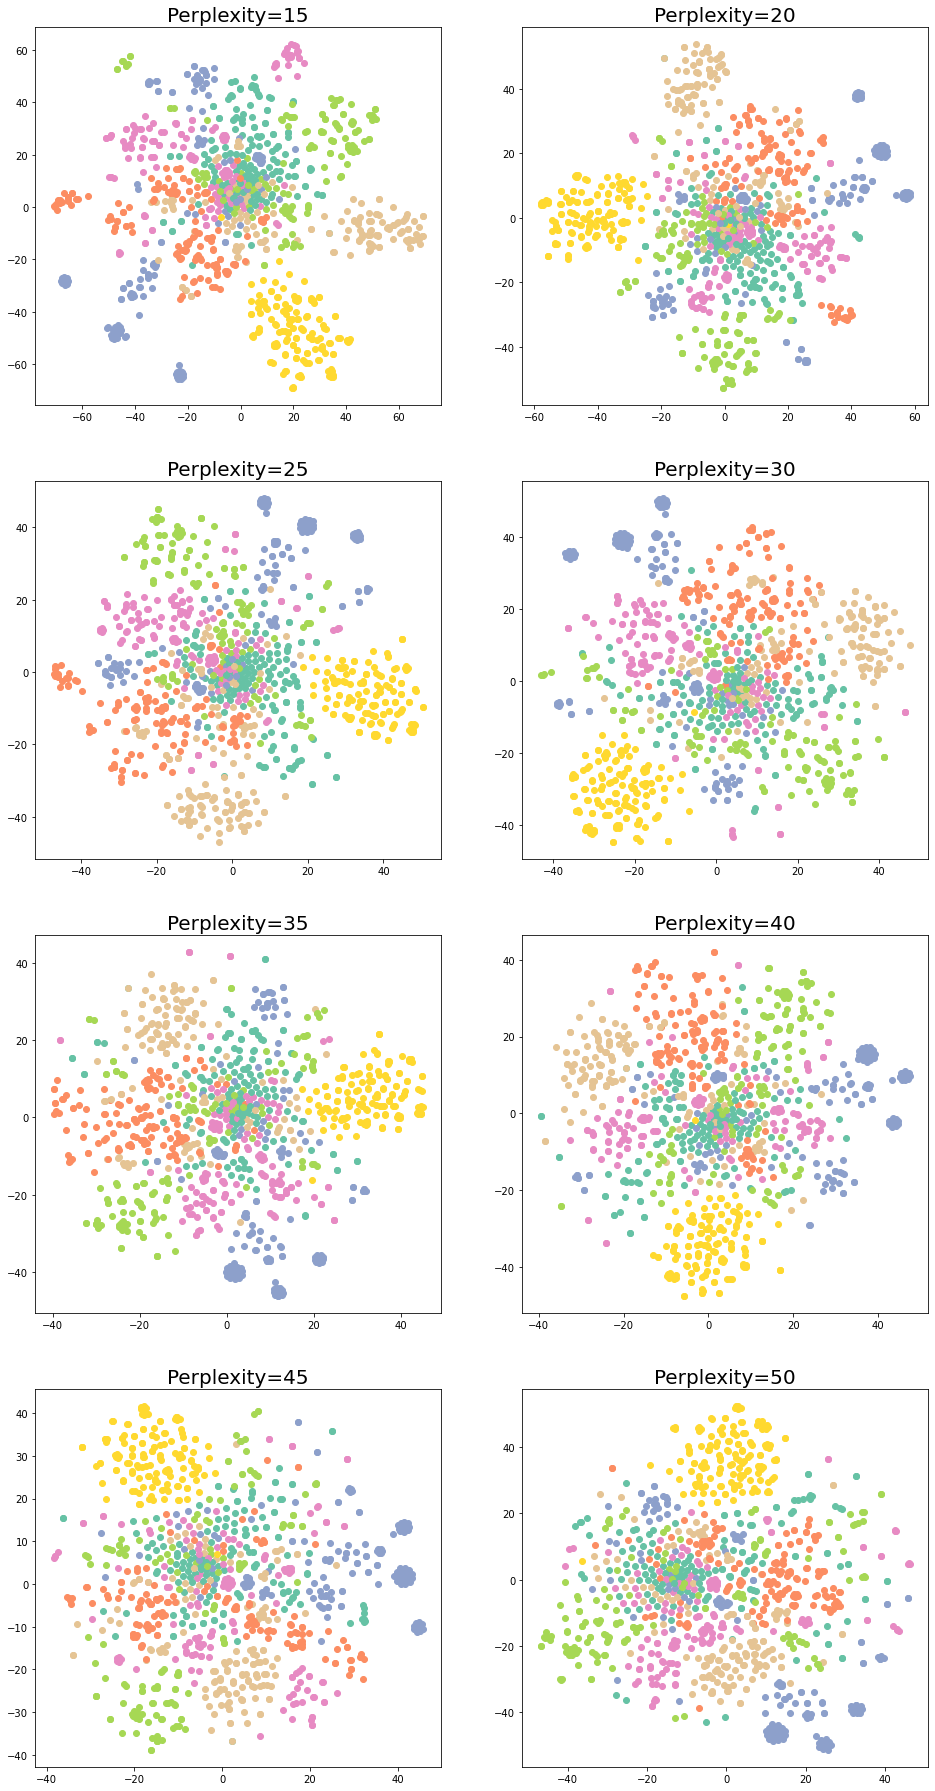

In [421]:
#On va essayer plusieurs perplexité, voir si les résultats sont plus clairs:
plt.figure(figsize=(16,32))
for k in range(8):
    plt.subplot(4,2,k+1)
    tsne=TSNE(n_components=2,perplexity=5*k+15)
    X_trans=tsne.fit_transform(X_proj)
    for i in range(text_data.shape[0]):
        for j in range(7):
            cat=text_data['cluster'][i]
            if cat==j:
                hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    plt.title('Perplexity='+str(5*k+15),size=20)
    
plt.show()

In [422]:
#On va partir sur une perplexité de 40 pour l'observation

In [423]:
tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize)
values = tfidf.fit_transform(text_data['bow'])


In [509]:
pca = decomposition.PCA(n_components=400)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 400)


In [510]:
tsne=TSNE(n_components=2,perplexity=40)
X_trans=tsne.fit_transform(X_proj)

In [511]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score,silhouette_score,davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

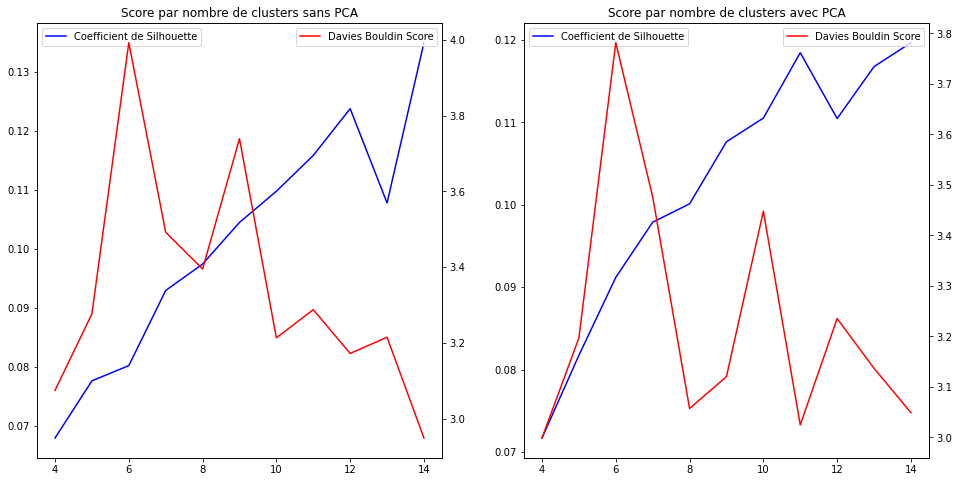

In [512]:
#On tente un KMean voir ce que ça donne:
#On se tente un kmean de 7:

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
silhouette=[]
DB=[]

for i in range(4,15):
    
    km=KMeans(n_clusters=i)
    km.fit(X)
    y=km.predict(X)
    silhouette.append(silhouette_score(X,y))
    DB.append(davies_bouldin_score(X,y))
     
sil=plt.plot(range(4,15),silhouette,c='b')
plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
ax2 = pyplot.gca().twinx()
db=plt.plot(range(4,15),DB,c='r')
plt.legend(db,['Davies Bouldin Score'],loc='upper right')
plt.title('Score par nombre de clusters sans PCA')

plt.subplot(1,2,2)
silhouette=[]
DB=[]

for i in range(4,15):
    
    km=KMeans(n_clusters=i)
    km.fit(X_proj)
    y=km.predict(X_proj)
    silhouette.append(silhouette_score(X_proj,y))
    DB.append(davies_bouldin_score(X_proj,y))
     
sil=plt.plot(range(4,15),silhouette,c='b')
plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
ax2 = pyplot.gca().twinx()
db=plt.plot(range(4,15),DB,c='r')
plt.legend(db,['Davies Bouldin Score'],loc='upper right')
plt.title('Score par nombre de clusters avec PCA')


plt.show()

In [428]:
#Comparons les scores de clustering avec ou sans PCA:
#Pour entre 6 et 13 clusters 

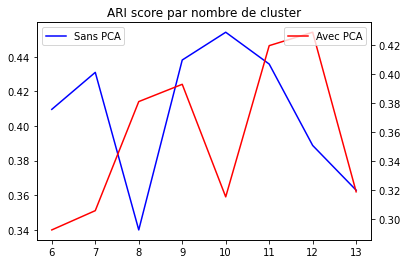

In [513]:
sanspca=[]
avecpca=[]
for i in range(6,14):
    kmpca=KMeans(n_clusters=i)
    kmpca.fit(X_proj)
    ypca=kmpca.predict(X_proj)

    km==KMeans(n_clusters=i)
    km.fit(X)
    y=km.predict(X)
    
    sanspca.append(adjusted_rand_score(y,text_data['cluster']))
    avecpca.append(adjusted_rand_score(ypca,text_data['cluster']))

sans=plt.plot(range(6,14),sanspca,c='b')
plt.legend(sans,['Sans PCA'],loc='upper left')
ax2 = pyplot.gca().twinx()
avec=plt.plot(range(6,14),avecpca,c='r')
plt.legend(avec,['Avec PCA'],loc='upper right')
plt.title('ARI score par nombre de cluster')

plt.show()


In [ ]:
#à 11 et 12 clusters on est pas mal

In [430]:
#On va regarder plusieurs clustering avec PCA pour voir ce que ça donne:


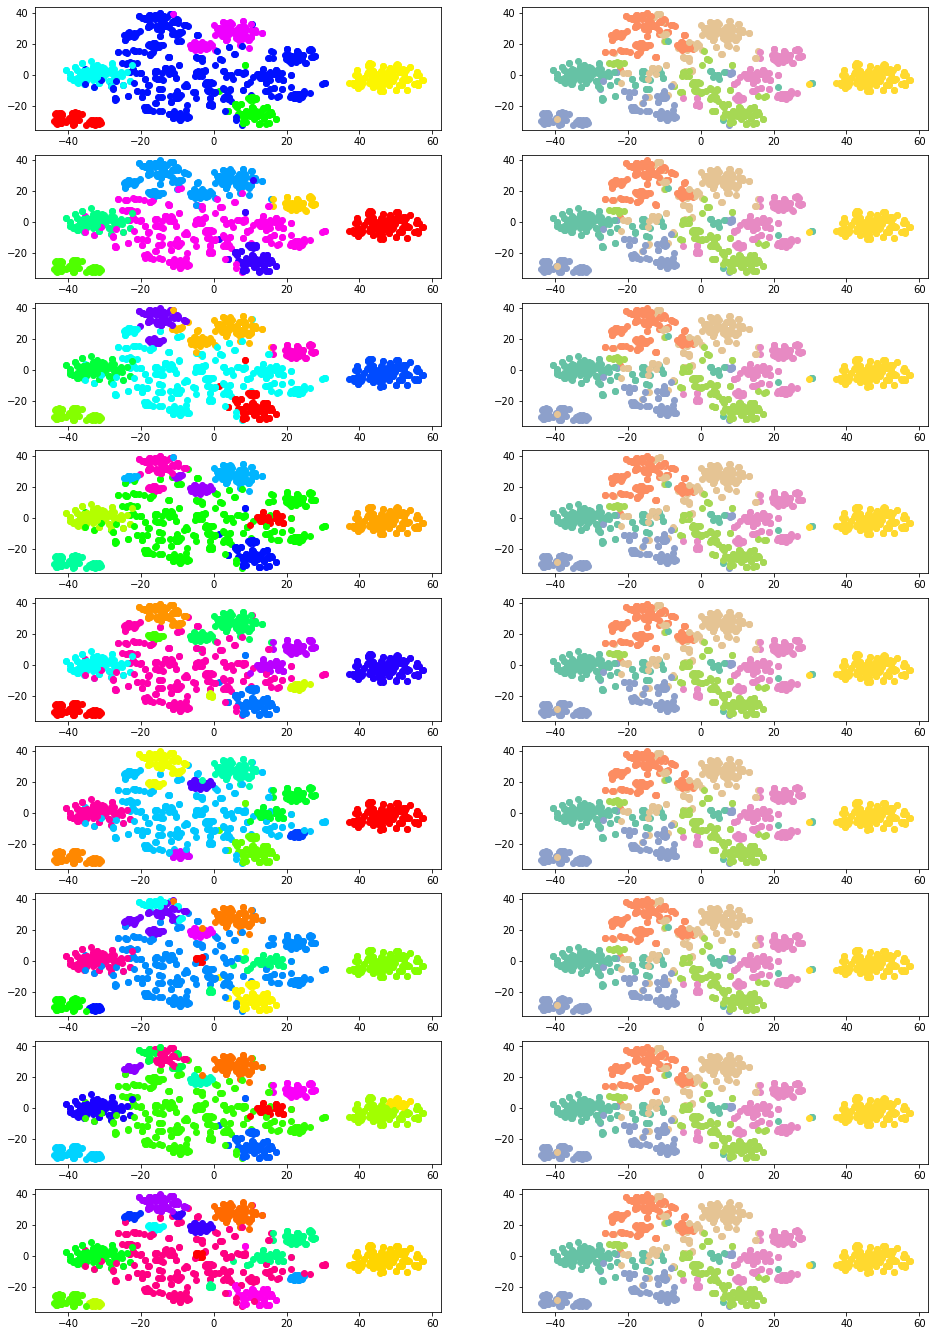

In [514]:
plt.figure(figsize=(16,24))
for k in range(9):
    km=KMeans(n_clusters=6+k)
    km.fit(X_proj)
    y=km.predict(X_proj)

    plt.subplot(9,2,2*k+1)
    for i in range(text_data.shape[0]):
        for j in range(6+k):
            cat=y[i]
            if cat==j:
                hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/(6+k)))
    
    plt.subplot(9,2,2*k+2)
    for i in range(text_data.shape[0]):
        for j in range(7):
            cat=text_data['cluster'][i]
            if cat==j:
                hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [ ]:
#On va partir sur 11 clusters

In [432]:
adjusted_rand_score(y,text_data['cluster'])

0.12418210192818749

# LDA

In [515]:
#On effectue une LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 7

tf_vect=CountVectorizer()
tf=tf_vect.fit_transform(text_data['bow'])

# Créer le modèle LDA
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=6, learning_method='batch')

# Fitter sur les données
lda.fit(tf)

LatentDirichletAllocation(max_iter=6, n_components=7)

In [516]:
Xlda=lda.transform(tf)

In [517]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tf_vect.get_feature_names(), no_top_words)


Topic 0:
mug baby ceram coff girl fabr detail dress boy pattern
Topic 1:
rout kadha steel sonat cut pizz glass kitch stainless bulb
Topic 2:
combo cotton battery towel singl bath baby leng bed lin
Topic 3:
warranty adapt wal cush dec smartpro charg art pow pad
Topic 4:
watch analog men wrist wom round gre discount bottl boy
Topic 5:
showpiec usb led ethn port brass dec wood pow flex
Topic 6:
polyest brown comfort curtain leng eyelet abstract quilt flor door


In [436]:
#On reconnait assez bien nos topics:
#même si il y a encore pas mal de mélanges

In [520]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

tf_vectorizer = CountVectorizer()

dtm_tf = tf_vectorizer.fit_transform(text_data['bow'].values)

# Définition de la méthode de pondération TF-IDF
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(text_data['bow'].values)

# Entrainement de TF DTM
lda_tf = LatentDirichletAllocation(n_components=3, random_state=0)
lda_tf.fit(dtm_tf)
# Entrainement de TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=3, random_state=0)
lda_tfidf.fit(dtm_tfidf)

# Visualisation de l'algorithme LDA TFIDF DTM (qui est la plus fiable en général)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1795: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.118605  0.117829       1        1  36.008151
1     -0.068878 -0.140685       2        1  32.629646
2      0.187484  0.022855       3        1  31.362203, topic_info=       Term       Freq      Total Category  logprob  loglift
933   watch  38.000000  38.000000  Default  30.0000  30.0000
29   analog  32.000000  32.000000  Default  29.0000  29.0000
60     baby  26.000000  26.000000  Default  28.0000  28.0000
169   combo  32.000000  32.000000  Default  27.0000  27.0000
563     mug  31.000000  31.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
104     boy   7.824848  16.907949   Topic3  -4.7751   0.3891
595   occas   6.317769  10.530866   Topic3  -4.9891   0.6486
131     cas   5.281421  11.429436   Topic3  -5.1682   0.3876
563     mug   5.964995  31.058547   Topic3  -5.0465  -0.4904
143   ceram   5.327499  18.944991   Topic3  -5.1596  -0.1091

[157 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4         1  0.188855  abstract
4         2  0.849846  abstract
27        3  0.937183   altimet
29        3  0.985238    analog
35        3  0.990411    antenn
...     ...       ...       ...
941       2  0.765597      wild
948       3  0.930971       wom
950       2  0.904564      wood
956       3  0.969773     wrist
961       3  0.868434        ym

[158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [522]:
Xlda

array([[0.00207849, 0.00207249, 0.00207335, ..., 0.00207068, 0.00207337,
        0.98755674],
       [0.00421634, 0.00420232, 0.9747575 , ..., 0.00421528, 0.00420171,
        0.00420462],
       [0.00186087, 0.00185608, 0.98885244, ..., 0.00186013, 0.00185667,
        0.00185675],
       ...,
       [0.08998337, 0.0102244 , 0.01023196, ..., 0.01020485, 0.38717185,
        0.0102095 ],
       [0.09800642, 0.01190829, 0.01193209, ..., 0.01190551, 0.01190618,
        0.01191001],
       [0.07404167, 0.00893118, 0.00895363, ..., 0.00892912, 0.33582875,
        0.00893245]])

In [523]:
LDA=pd.DataFrame(Xlda)

In [524]:
LDA[1]

0       0.002072
1       0.004202
2       0.001856
3       0.002507
4       0.001723
          ...   
1045    0.001564
1046    0.002422
1047    0.010224
1048    0.011908
1049    0.008931
Name: 1, Length: 1050, dtype: float64

In [525]:
LDA['max']=LDA.T.idxmax()

In [526]:
LDA['max']

0       6
1       2
2       2
3       2
4       2
       ..
1045    3
1046    3
1047    3
1048    3
1049    3
Name: max, Length: 1050, dtype: int64

In [527]:
adjusted_rand_score(LDA['max'],text_data['cluster'])

0.345463628987759

In [528]:
X_trans

array([[-15.293427 ,  18.522238 ],
       [ -2.609139 ,  18.024668 ],
       [ -6.3043256,  17.000765 ],
       ...,
       [ -9.517635 ,   6.1334476],
       [-13.228966 ,   4.341033 ],
       [ -9.573265 ,   6.080493 ]], dtype=float32)

In [529]:
text_data['cluster']

0       1
1       6
2       6
3       1
4       1
       ..
1045    6
1046    6
1047    6
1048    6
1049    6
Name: cluster, Length: 1050, dtype: int64

In [530]:
X_true=pd.DataFrame(np.vstack([X_trans.T,text_data['cluster'].T]).T)

In [531]:
X_true[2]=X_true[2].astype(int)

In [532]:
X_true['categorie']=text_data['categorie']

In [533]:
X_true

0          1  2         categorie
0    -15.293427  18.522238  1  Home Furnishing 
1     -2.609139  18.024668  6        Baby Care 
2     -6.304326  17.000765  6        Baby Care 
3    -10.521826  26.377560  1  Home Furnishing 
4    -11.411308  26.135242  1  Home Furnishing 
...         ...        ... ..               ...
1045 -12.231877   0.527422  6        Baby Care 
1046 -13.496837   3.624797  6        Baby Care 
1047  -9.517635   6.133448  6        Baby Care 
1048 -13.228966   4.341033  6        Baby Care 
1049  -9.573265   6.080493  6        Baby Care 

[1050 rows x 4 columns]

In [534]:
X_lda=pd.DataFrame(np.vstack([X_trans.T,LDA['max'].T]).T)

In [535]:
X_lda[2]=X_lda[2].astype(int)

In [536]:
km=KMeans(n_clusters=11,n_init=20)
km.fit(X_proj)
y=km.predict(X_proj)
X_km=pd.DataFrame(np.vstack([X_trans.T,y.T]).T)

In [537]:
X_km

0          1    2
0    -15.293427  18.522238  7.0
1     -2.609139  18.024668  3.0
2     -6.304326  17.000765  3.0
3    -10.521826  26.377560  3.0
4    -11.411308  26.135242  3.0
...         ...        ...  ...
1045 -12.231877   0.527422  4.0
1046 -13.496837   3.624797  4.0
1047  -9.517635   6.133448  4.0
1048 -13.228966   4.341033  4.0
1049  -9.573265   6.080493  4.0

[1050 rows x 3 columns]

In [538]:
text_data[['categorie','cluster']][-text_data[['categorie','cluster']].duplicated()]

categorie  cluster
0            Home Furnishing         1
1                  Baby Care         6
5                    Watches         5
36                Home Decor         0
37                   Kitchen         2
43  Beauty and Personal Care         4
47                 Computers         3

In [539]:
df=X_lda[X_lda[2]==1]
df.values[:,1]

array([  0.89768499,   7.62958384, -23.54307938, -13.5965414 ,
       -25.70351601,  -9.60351753,   3.28854704,  -9.16559124,
        -7.29998159,  -7.31797171, -21.96174431, -22.65038109,
       -21.98793793, -21.15614891, -22.77700233, -20.70182228,
       -22.77082253, -22.56136131, -26.56665421, -21.43389511,
       -27.53950691, -28.1765976 , -26.45004463, -24.5849781 ,
       -26.98025513, -25.21842957, -29.34412003, -27.94993973,
       -26.77422523, -26.56485939, -29.34411812, -28.02589417,
       -27.52984047, -27.7330246 , -26.91199493, -25.71811104,
       -26.65168762, -20.9552784 , -25.75925446, -25.85399055,
        -9.18774128, -12.2066946 ,  -4.28310871,  12.12302494,
        10.54550362,   9.45175457,   7.56676388,  16.67295265,
         7.93291759,  15.19367504,  11.30588722,   9.27970123,
        10.15956116,  14.1640377 ,  12.68742275,  15.55233669,
         9.22017384,  11.71670246,   7.70014668,  14.67217827,
        16.35829353,  15.87842941,  10.30627632,  16.33

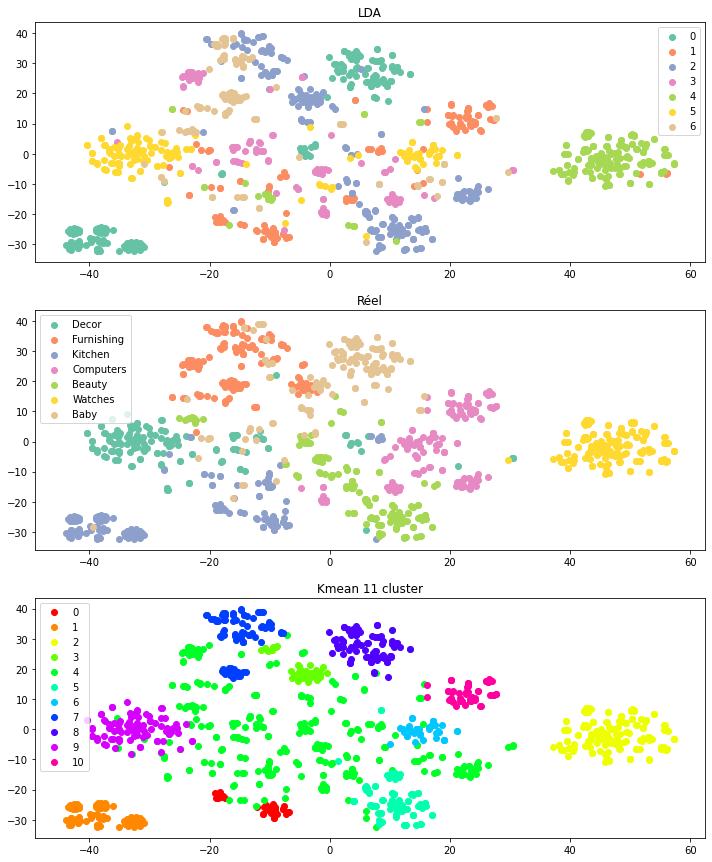

In [540]:
plt.figure(figsize=(12,15))
labels=['Decor','Furnishing','Kitchen','Computers','Beauty','Watches','Baby']

plt.subplot(3,1,1)
for i in range(7):
    plt.scatter(X_lda[X_lda[2]==i].values[:,0],X_lda[X_lda[2]==i].values[:,1],color=plt.cm.Set2(i/(7)),label=i)
plt.legend()
plt.title('LDA')
            
plt.subplot(3,1,2)
for i in range(7):
    plt.scatter(X_true[X_true[2]==i].values[:,0],X_true[X_true[2]==i].values[:,1],color=plt.cm.Set2(i/(7)),label=labels[i])
plt.legend()
plt.title('Réel')


plt.subplot(3,1,3)
for i in range(11):
    plt.scatter(X_km[X_km[2]==i].values[:,0],X_km[X_km[2]==i].values[:,1],color=plt.cm.hsv(i/(11)),label=i)
plt.legend()
plt.title('Kmean 11 cluster')
            
plt.show()

In [459]:
#Finalement, en combinant Kmean et LDA on doit pouvoir avoir de bons résultats:
#On assigne les couleurs du Kmean sauf les jaunes
#On traite les jaunes avec la LDA


In [460]:
#On regarde les ARI:
print(adjusted_rand_score(y,text_data['cluster']))
print(adjusted_rand_score(X_lda[2],text_data['cluster']))

0.1069570998996395
0.3369870679883234


In [461]:
#On essai:
dicocat={'km':{0:3,1:5,2:6,3:2,4:0,6:4,7:1,8:1,9:1,10:1},'ld':{0:3,1:6,2:6,3:3,4:2,5:4,6:3}}

In [462]:
X_true['kmean']=X_km[2]
X_true['lda']=X_lda[2]

In [463]:
X_true['kmean']=X_true['kmean'].astype(int)

In [464]:
X_true

0          1  2         categorie  kmean  lda
0     -7.258750   6.828188  1  Home Furnishing       3    4
1     18.066389 -12.912930  6        Baby Care       5    3
2     22.842180 -25.710009  6        Baby Care       5    3
3      7.489628  -8.976349  1  Home Furnishing       5    6
4     10.205745 -10.551837  1  Home Furnishing       5    3
...         ...        ... ..               ...    ...  ...
1045  -0.280690 -12.736613  6        Baby Care       5    6
1046   0.905152 -12.418217  6        Baby Care       5    6
1047  18.939568 -17.452139  6        Baby Care       5    3
1048   0.602310 -10.318292  6        Baby Care       5    6
1049   8.702266  -9.729589  6        Baby Care       5    3

[1050 rows x 6 columns]

In [465]:
X_true['predicted']=np.nan

In [466]:
X_true['kmean']

0       3
1       5
2       5
3       5
4       5
       ..
1045    5
1046    5
1047    5
1048    5
1049    5
Name: kmean, Length: 1050, dtype: int64

In [467]:
def transform(row):
    if row['kmean']!=5:
        row['predicted']=dicocat['km'][row['kmean']]
    else:
        row['predicted']=dicocat['ld'][row['lda']]
    return row

In [468]:
X_true.iloc[2]['kmean']

5

In [469]:
X_true=X_true.apply(lambda row: transform(row),axis=1)

In [470]:
X_true

0          1  2         categorie  kmean  lda  predicted
0     -7.258750   6.828188  1  Home Furnishing       3    4          2
1     18.066389 -12.912930  6        Baby Care       5    3          3
2     22.842180 -25.710009  6        Baby Care       5    3          3
3      7.489628  -8.976349  1  Home Furnishing       5    6          3
4     10.205745 -10.551837  1  Home Furnishing       5    3          3
...         ...        ... ..               ...    ...  ...        ...
1045  -0.280690 -12.736613  6        Baby Care       5    6          3
1046   0.905152 -12.418217  6        Baby Care       5    6          3
1047  18.939568 -17.452139  6        Baby Care       5    3          3
1048   0.602310 -10.318292  6        Baby Care       5    6          3
1049   8.702266  -9.729589  6        Baby Care       5    3          3

[1050 rows x 7 columns]

In [471]:
adjusted_rand_score(X_true[2],X_true['predicted'])

0.20415867785921318

In [472]:
LDA

0         1         2         3         4         5         6  \
0     0.002078  0.002076  0.002075  0.119962  0.729061  0.142667  0.002081   
1     0.004221  0.064954  0.004203  0.914012  0.004206  0.004202  0.004203   
2     0.001861  0.025064  0.001862  0.965631  0.001861  0.001860  0.001861   
3     0.246128  0.002513  0.002507  0.291976  0.002507  0.002507  0.451862   
4     0.001725  0.001722  0.001723  0.652125  0.001722  0.001723  0.339261   
...        ...       ...       ...       ...       ...       ...       ...   
1045  0.001556  0.001554  0.001556  0.001555  0.001559  0.001556  0.990665   
1046  0.002431  0.002440  0.002423  0.002425  0.002422  0.002426  0.985432   
1047  0.010222  0.010204  0.010204  0.938682  0.010208  0.010209  0.010270   
1048  0.012033  0.011908  0.011905  0.011943  0.011907  0.011909  0.928395   
1049  0.008949  0.008932  0.008929  0.493050  0.008931  0.008930  0.462280   

      max  
0       4  
1       3  
2       3  
3       6  
4       3  
...   ...  
1045    6  
1046    6  
1047    3  
1048    6  
1049    3  

[1050 rows x 8 columns]

In [473]:
#J'essai une LDA avec 11 clusters qui avait un bon clustering avec et sans PCA:
#On effectue une LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 11

tf_vect=CountVectorizer()
tf=tf_vect.fit_transform(text_data['bow'])

# Créer le modèle LDA
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=6, learning_method='batch')

# Fitter sur les données
lda.fit(tf)

LatentDirichletAllocation(max_iter=6, n_components=11)

In [474]:
Xlda=lda.transform(tf)

In [475]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tf_vect.get_feature_names(), no_top_words)


Topic 0:
adapt warranty charg smartpro vaio vgn cr pow pleas sof
Topic 1:
port led pow flex prith tabl keyboard lamp warranty gb
Topic 2:
mug ceram coff perfect lov cush rockmantr saf ml tea
Topic 3:
watch analog men wrist wom round gre towel discount boy
Topic 4:
combo rout hair deod fragr pizz cut condit nat wom
Topic 5:
bottl digit wat pad warranty mous combo nutcas ml access
Topic 6:
wal dec blanket doubl bed ganesh singl abstract room brass
Topic 7:
baby cotton girl fabr dress detail pattern leng sleev wear
Topic 8:
wood kadha ethn pot led art pap bulb fram wok
Topic 9:
comfort singl polyest curtain eyelet brown cotton flor quilt baby
Topic 10:
battery lapguard cel capac brass hp akup access buddh bowl


In [476]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.
